In [1]:
import numpy as np
from sight_line_constructor import Sightline
import read_cubes
from scipy import ndimage
import matplotlib.pyplot as plt
from astropy.io import ascii



In [2]:
path = "/var/lib/libvirt/images/nbody/baorsd/run101/density_field/"

cube = read_cubes.read(path+"S020_CIC1024_conf.bin")

In [41]:
res = 2
start_point = np.array([0,0,0]) #Mpc/h
end_point = np.array([500,500,0]) #Mpc/h


In [42]:
s1 = Sightline(start_point,end_point,num=3000)

In [43]:
los_dens = s1.calc_los(res,cube)

In [44]:
end_points = np.random.uniform(-2,2,(5,3))

In [45]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

In [46]:
from scipy import interpolate

cosmo = FlatLambdaCDM(H0=100, Om0=0.315)

reds = np.linspace(0.,10.,10000)
dists = cosmo.comoving_distance(reds)

z_dist = interpolate.interp1d(reds, dists)



In [47]:
files = ascii.read('/home/mata/cosmic-sightlines/simlist.txt',names=["filename", 'redshift'])

In [48]:
z_dist(files['redshift'].data)

array([2990.59785349, 2821.67991357, 2656.19952512, 2493.88159244,
       2334.43809439, 2177.61231632, 2023.18108248, 1870.91593272,
       1720.60666364, 1572.0561105 , 1425.06900518, 1279.45875188,
       1135.04359213,  991.63674372,  849.05714337,  707.12042403,
        565.62997617,  424.39312659,  283.19353311,  141.80987524,
          0.        ])

In [49]:
#Function to read in particular file for distance

#first read all files:
n_files = len(files)
nc = 1024
#make an array of all files with corresponding redshift

l_arr = []
for i in range(len(files)):
    tmp = read_cubes.read(path+str(files[i]['filename']))
    l_arr.append(tmp)
l_arr = np.asarray(l_arr)



In [50]:
# dump the sightlines in an array too
los_arr = []
for i in l_arr:
    los_arr.append(s1.calc_los(res,i))
los_arr = np.asarray(los_arr)


<ipython-input-109-72b0d62268e0>:3: RuntimeWarning: invalid value encountered in log
  s = np.log(l_arr[i][:,:,0]+1)


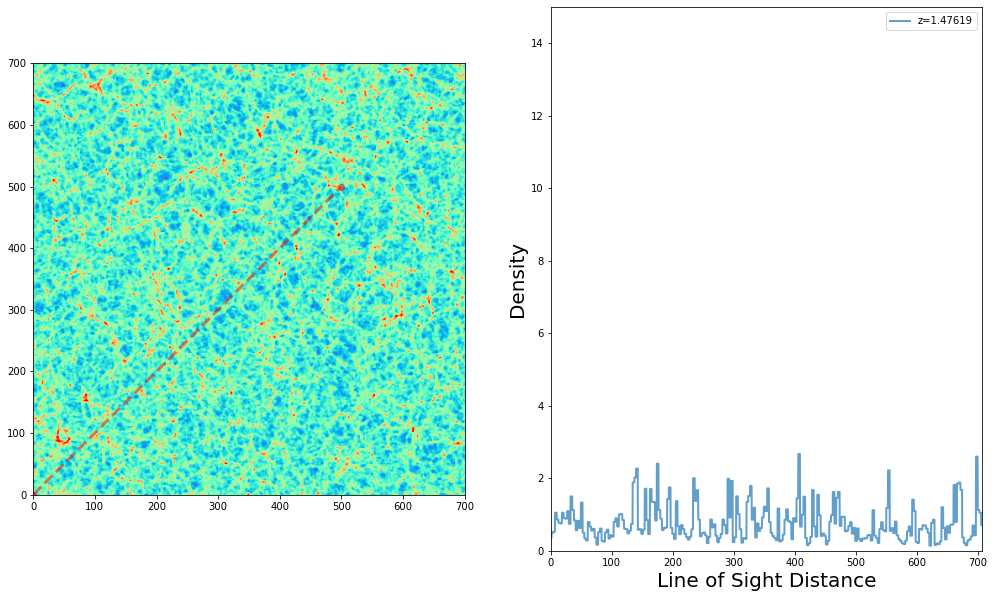

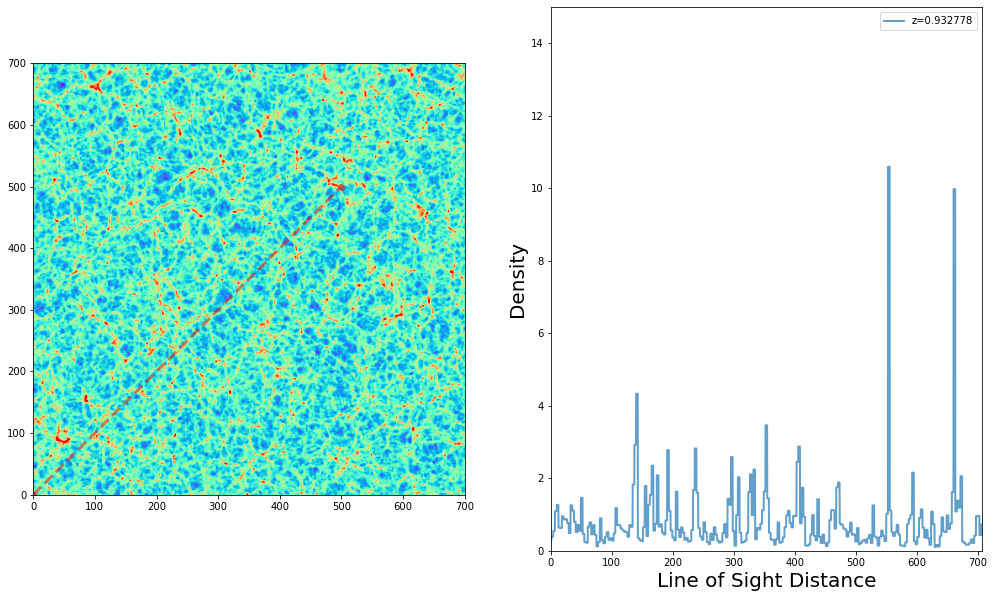

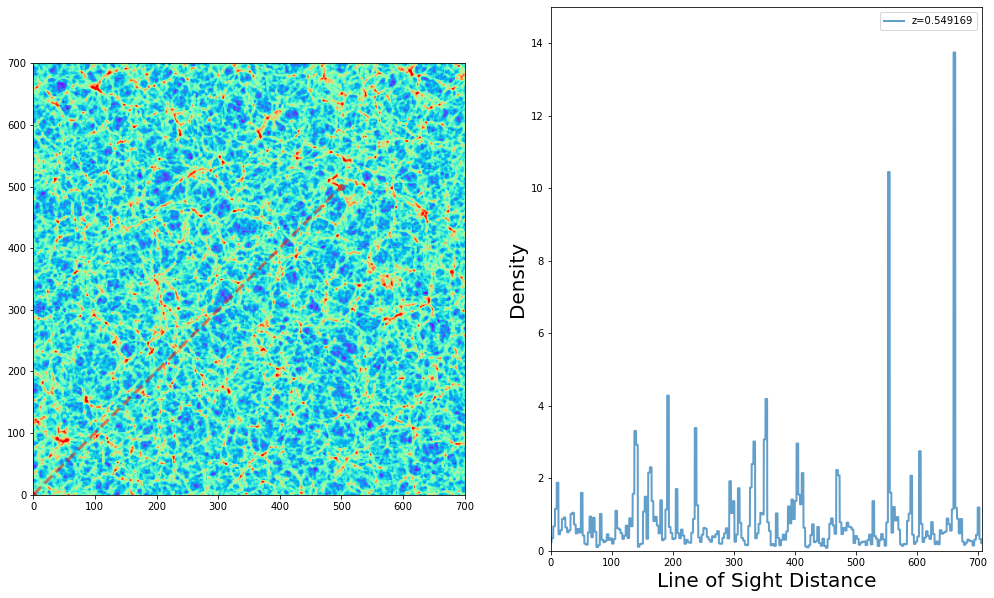

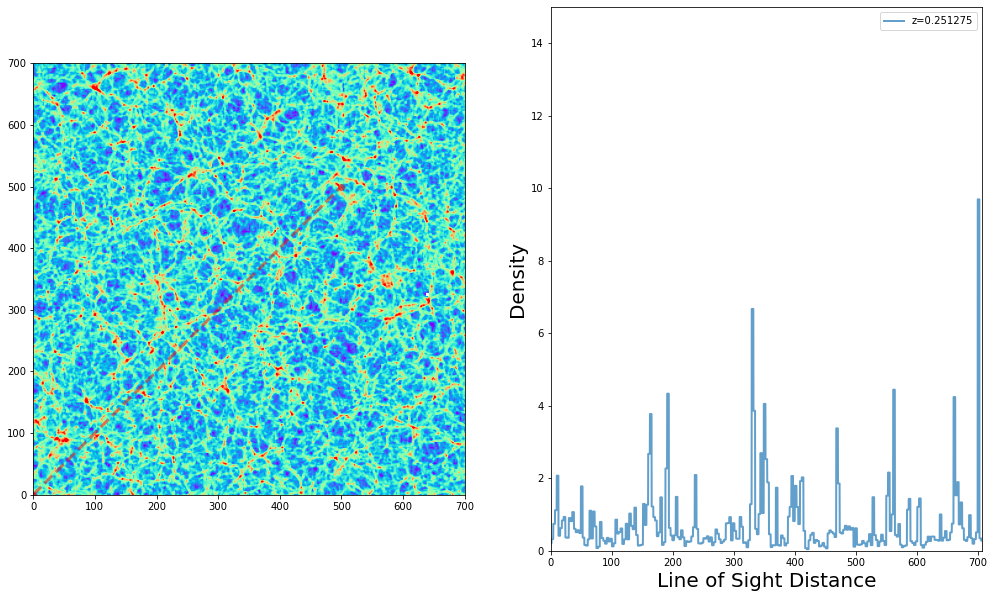

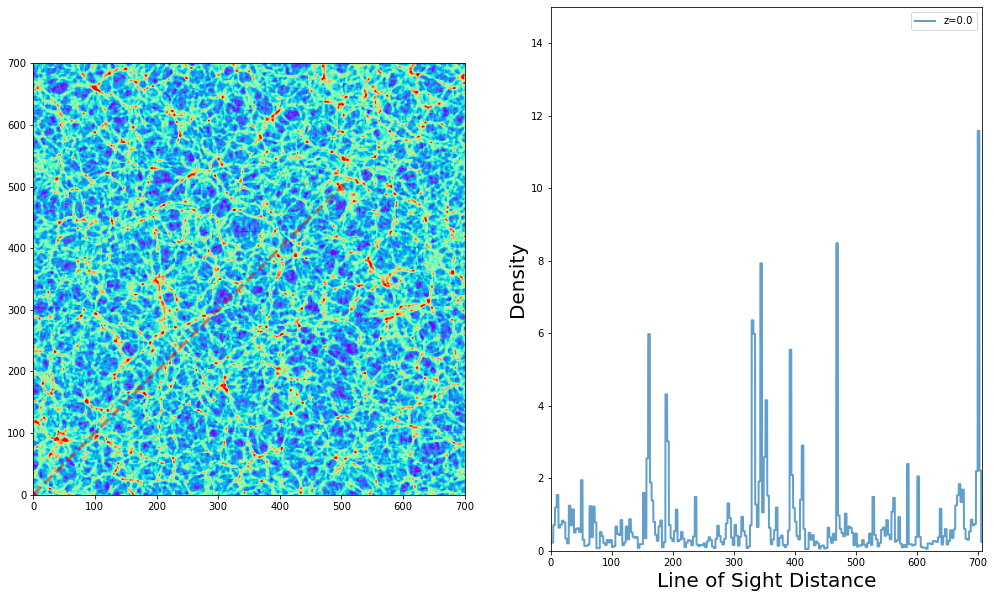

In [109]:
for i in range(len(los_arr))[::5]:
    fig, ax = plt.subplots(ncols=2,figsize=(17,10))
    s = np.log(l_arr[i][:,:,0]+1)
    ax[0].imshow(s.T,vmin=-3,vmax=3,origin="lower",aspect="equal", interpolation="bilinear", extent=[0,2048.,0,2048],cmap="rainbow")
    ax[0].plot([start_point[0], end_point[0]], [start_point[1],  end_point[1]], 'ro--',lw=3,alpha=0.5)
    ax[0].set_xlim(0,700)
    ax[0].set_ylim(0,700)


    ax[1].plot(np.linspace(0,s1.r,s1.num),los_arr[i]+1,alpha=0.7,lw=2,label="z="+str(files["redshift"][i]))

    ax[1].set_xlim(0,s1.r)
    ax[1].set_ylim(0,15)

    ax[1].set_xlabel("Line of Sight Distance",fontsize=20)
    ax[1].set_ylabel("Density",fontsize=20)
    ax[1].legend()
